In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from platypus import NSGAII, Problem, Real, Subset, nondominated
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [135]:
google1 = pd.read_csv("dataset1/googleads-performance.csv")
google2 = pd.read_csv("dataset2/googleads-performance.csv")
meta1 = pd.read_csv("dataset1/metaads-performance.csv")
meta2 = pd.read_csv("dataset2/metaads-performance.csv")
microsoft1 = pd.read_csv("dataset1/microsoftads-performance.csv")
microsoft2 = pd.read_csv("dataset2/microsoftads-performance.csv")
landings1 = pd.read_csv("dataset1/website-landings.csv")
landings2 = pd.read_csv("dataset2/website-landings.csv")

In [136]:
pd.concat([google1, google2]).to_csv("google.csv", index=False)
pd.concat([meta1, meta2]).to_csv("meta.csv", index=False)
pd.concat([microsoft1, microsoft2]).to_csv("microsoft.csv", index=False)
pd.concat([landings1, landings2]).to_csv("landings.csv", index=False)

In [137]:
google = pd.read_csv("google.csv")
meta = pd.read_csv("meta.csv")
microsoft = pd.read_csv("microsoft.csv")
landings = pd.read_csv("landings.csv")

In [120]:
google["Campaign type"].unique()

array(['Cross-network', 'Display Network', 'Search Network', 'YouTube'],
      dtype=object)

In [121]:
google[(google["Campaign type"] == "Cross-network")].Date.value_counts()

Date
2024-01-01    2
2024-04-24    2
2024-04-26    2
2024-04-27    2
2024-04-28    2
             ..
2024-03-03    2
2024-03-04    2
2024-03-05    2
2024-03-06    2
2024-06-30    2
Name: count, Length: 182, dtype: int64

In [138]:
google["Date"] = pd.to_datetime(google["Date"])
google = google.groupby(["Campaign type", "Date"]).aggregate('sum')
google = google.reset_index()

In [139]:
print(google[google["Campaign type"] == "Cross-network"].shape)
print(google[google["Campaign type"] == "Display Network"].shape)
print(google[google["Campaign type"] == "Search Network"].shape)
print(google[google["Campaign type"] == "YouTube"].shape)

(182, 7)
(178, 7)
(182, 7)
(182, 7)


In [140]:
temp = google[google["Campaign type"] == "Display Network"]
count = 0
for i in range(183, 360):
    if temp['Date'][i] - temp['Date'][i - 1] != timedelta(days=1):
        print(i)
        count += 1
    if count == 4:
        break

293
299
333
339


In [141]:
print(temp["Date"][292], temp["Date"][293])
print(temp["Date"][298], temp["Date"][299])
print(temp["Date"][332], temp["Date"][333])
print(temp["Date"][338], temp["Date"][339])

2024-04-20 00:00:00 2024-04-22 00:00:00
2024-04-27 00:00:00 2024-04-29 00:00:00
2024-06-01 00:00:00 2024-06-03 00:00:00
2024-06-08 00:00:00 2024-06-10 00:00:00


In [142]:
rows = pd.DataFrame([{"Campaign type": "Display Network", "Date": datetime(2024, 4, 21)}, 
        {"Campaign type": "Display Network", "Date": datetime(2024, 4, 28)},
        {"Campaign type": "Display Network", "Date": datetime(2024, 6, 2)},
        {"Campaign type": "Display Network", "Date": datetime(2024, 6, 9)}])
google = pd.concat([google, rows]).fillna(0).sort_values(by=["Campaign type", "Date"]).reset_index(drop=True).set_index("Date")
google.to_csv("google.csv", index=True)

In [143]:
microsoft["Campaign type"].unique()

array(['Audience', 'Performance max', 'Search & content', 'Shopping'],
      dtype=object)

In [144]:
microsoft[(microsoft["Campaign type"] == "Shopping")].Date.value_counts()

Date
2024-01-01    2
2024-04-24    2
2024-04-26    2
2024-04-27    2
2024-04-28    2
             ..
2024-03-03    2
2024-03-04    2
2024-03-05    2
2024-03-06    2
2024-06-30    2
Name: count, Length: 182, dtype: int64

In [145]:
microsoft["Date"] = pd.to_datetime(microsoft["Date"])
microsoft = microsoft.groupby(["Campaign type", "Date"]).aggregate('sum')
microsoft = microsoft.reset_index()

In [146]:
print(microsoft[microsoft["Campaign type"] == "Audience"].shape)
print(microsoft[microsoft["Campaign type"] == "Performance max"].shape)
print(microsoft[microsoft["Campaign type"] == "Search & content"].shape)
print(microsoft[microsoft["Campaign type"] == "Shopping"].shape)

(182, 7)
(175, 7)
(182, 7)
(182, 7)


In [147]:
temp = microsoft[microsoft["Campaign type"] == "Performance max"]
count = 0
for i in range(183, 356):
    if temp['Date'][i] - temp['Date'][i - 1] != timedelta(days=1):
        print(i)
        count += 1
    if count == 7:
        break

203
204
205
208


In [148]:
print(temp["Date"][202], temp["Date"][203])
print(temp["Date"][203], temp["Date"][204])
print(temp["Date"][204], temp["Date"][205])
print(temp["Date"][207], temp["Date"][208])

2024-01-21 00:00:00 2024-01-24 00:00:00
2024-01-24 00:00:00 2024-01-26 00:00:00
2024-01-26 00:00:00 2024-01-29 00:00:00
2024-01-31 00:00:00 2024-02-03 00:00:00


In [149]:
rows = pd.DataFrame([{"Campaign type": "Performance max", "Date": datetime(2024, 1, 22)}, 
        {"Campaign type": "Performance max", "Date": datetime(2024, 1, 23)},
        {"Campaign type": "Performance max", "Date": datetime(2024, 1, 25)},
        {"Campaign type": "Performance max", "Date": datetime(2024, 1, 27)},
        {"Campaign type": "Performance max", "Date": datetime(2024, 1, 28)},
        {"Campaign type": "Performance max", "Date": datetime(2024, 2, 1)},
        {"Campaign type": "Performance max", "Date": datetime(2024, 2, 2)}])
microsoft = pd.concat([microsoft, rows]).fillna(0).sort_values(by=["Campaign type", "Date"]).reset_index(drop=True).set_index("Date")
microsoft.to_csv("microsoft.csv", index=True)

In [150]:
meta = meta.groupby(["Date"]).aggregate('sum')
meta["Campaign type"] = "Meta"
meta.to_csv("meta.csv", index=True)

In [49]:
google = pd.read_csv("google.csv")
microsoft = pd.read_csv("microsoft.csv")
meta = pd.read_csv("meta.csv")
ads = pd.concat([google, microsoft, meta]).drop("Reach", axis=1)
ads.to_csv("ads.csv", index=False)

In [50]:
ads = pd.read_csv("ads.csv")
ads = ads.set_index("Date")
ads["ROI"] = ads["Revenue"] / ads["Cost"]
ads["Platform"] = np.where((ads["Campaign type"].isin(["Cross-network", "Display Network", "Search Network", "YouTube"])), "Google", 
                            np.where(ads["Campaign type"].isin(["Audience", "Performance max", "Search & content", "Shopping"]), "Microsoft", "Meta"))
ads["Click Through Rate"] = ads["Clicks"] / ads["Impressions"]
ads["Conversion Rate"] = ads["Conversions"] / ads["Clicks"]
ads = ads[["Platform", "Campaign type", "Cost", "Revenue", "Click Through Rate", "Conversion Rate", "ROI"]]

In [52]:
ads

,Platform,Campaign type,Cost,Revenue,Click Through Rate,Conversion Rate,ROI
Date,,,,,,,
2024-01-01,Google,Cross-network,2613.7,19245.8,0.010168,0.038951,7.363431
2024-01-02,Google,Cross-network,3580.9,23205.2,0.009335,0.040209,6.480270
2024-01-03,Google,Cross-network,3550.8,24182.9,0.009186,0.044432,6.810550
2024-01-04,Google,Cross-network,3176.2,27999.4,0.010260,0.049917,8.815377
2024-01-05,Google,Cross-network,2950.6,20000.4,0.010583,0.042608,6.778418
...,...,...,...,...,...,...,...
2024-06-26,Meta,Meta,314.3,8778.7,0.018358,0.046171,27.930958
2024-06-27,Meta,Meta,278.7,10476.1,0.028675,0.036092,37.589164
2024-06-28,Meta,Meta,284.0,8220.4,0.028620,0.024410,28.945070


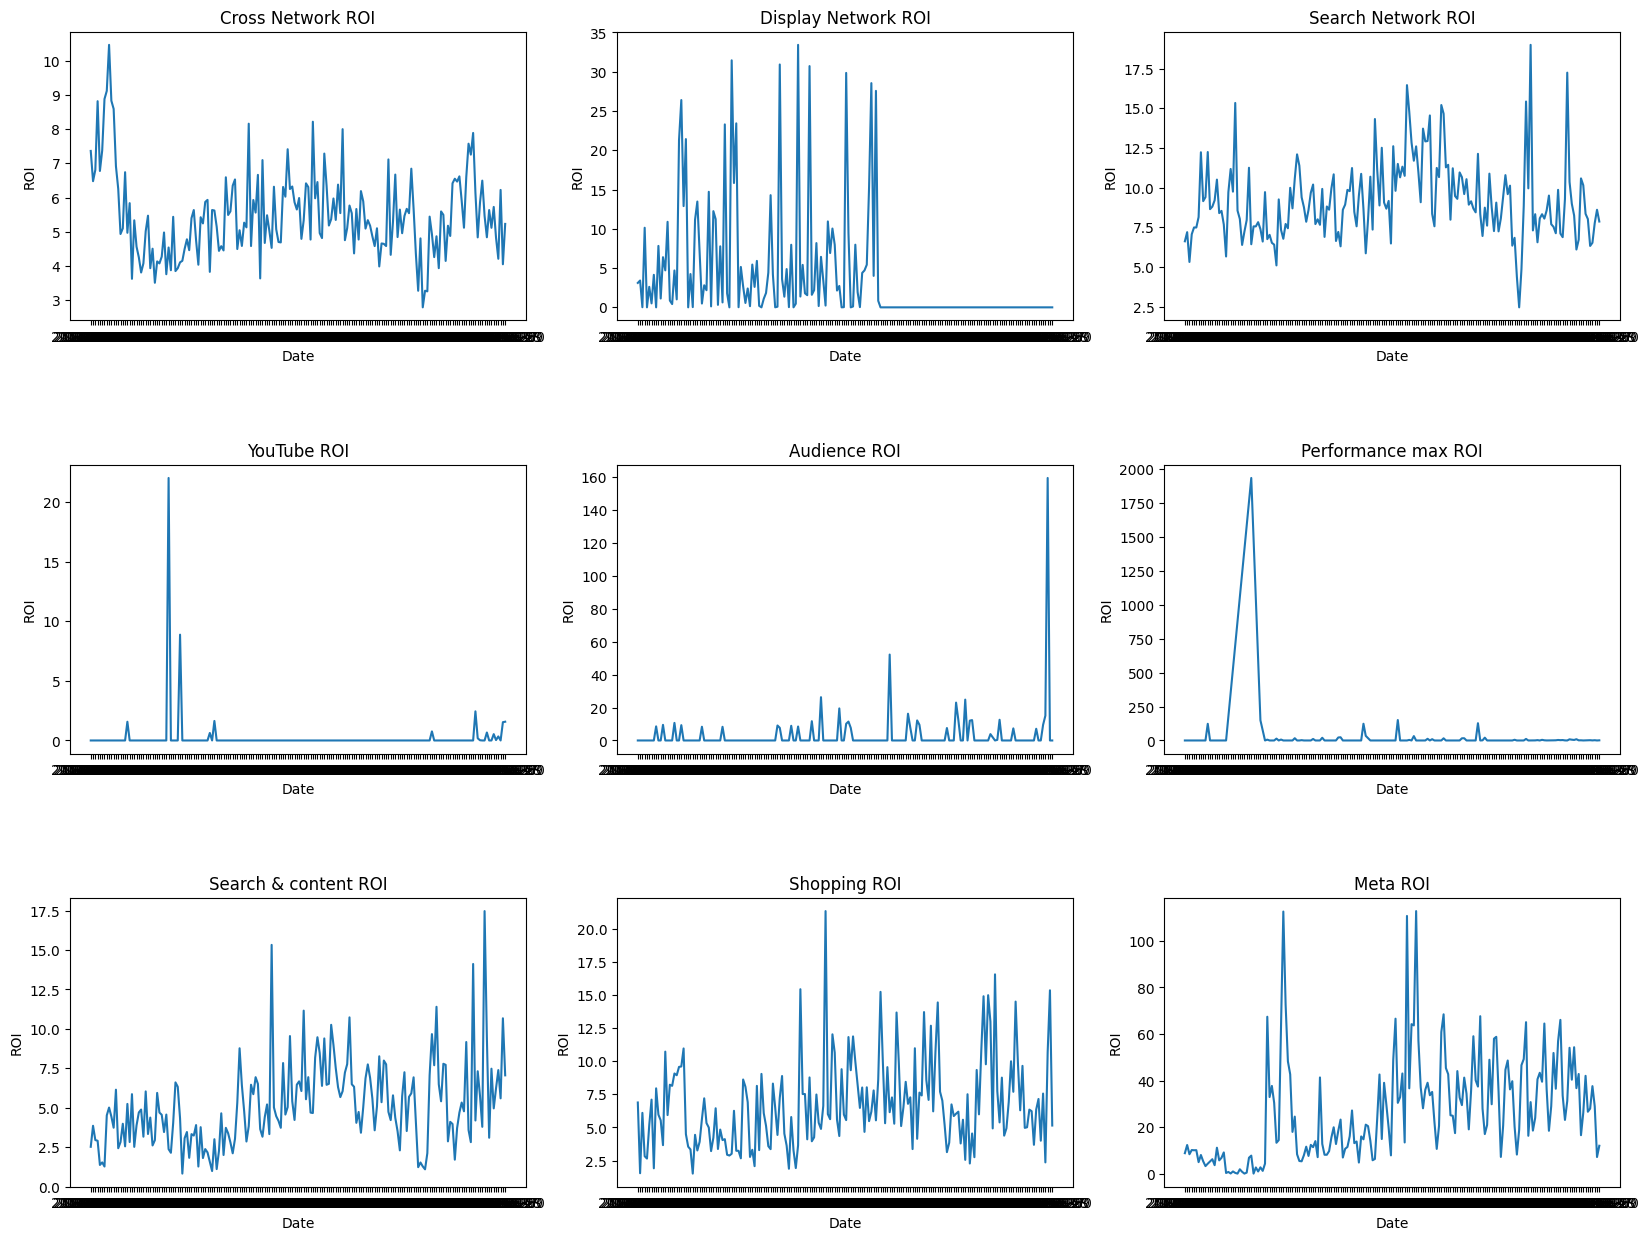

In [64]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

sns.lineplot(ads[ads["Campaign type"] == "Cross-network"].ROI, ax=axes[0])
axes[0].set_title("Cross Network ROI")

sns.lineplot(ads[ads["Campaign type"] == "Display Network"].ROI, ax=axes[1])
axes[1].set_title("Display Network ROI")

sns.lineplot(ads[ads["Campaign type"] == "Search Network"].ROI, ax=axes[2])
axes[2].set_title("Search Network ROI")

sns.lineplot(ads[ads["Campaign type"] == "YouTube"].ROI, ax=axes[3])
axes[3].set_title("YouTube ROI")

sns.lineplot(ads[ads["Campaign type"] == "Audience"].ROI, ax=axes[4])
axes[4].set_title("Audience ROI")

sns.lineplot(ads[ads["Campaign type"] == "Performance max"].ROI, ax=axes[5])
axes[5].set_title("Performance max ROI")

sns.lineplot(ads[ads["Campaign type"] == "Search & content"].ROI, ax=axes[6])
axes[6].set_title("Search & content ROI")

sns.lineplot(ads[ads["Campaign type"] == "Shopping"].ROI, ax=axes[7])
axes[7].set_title("Shopping ROI")

sns.lineplot(ads[ads["Campaign type"] == "Meta"].ROI, ax=axes[8])
axes[8].set_title("Meta ROI")

plt.subplots_adjust(hspace=0.5)
plt.show()

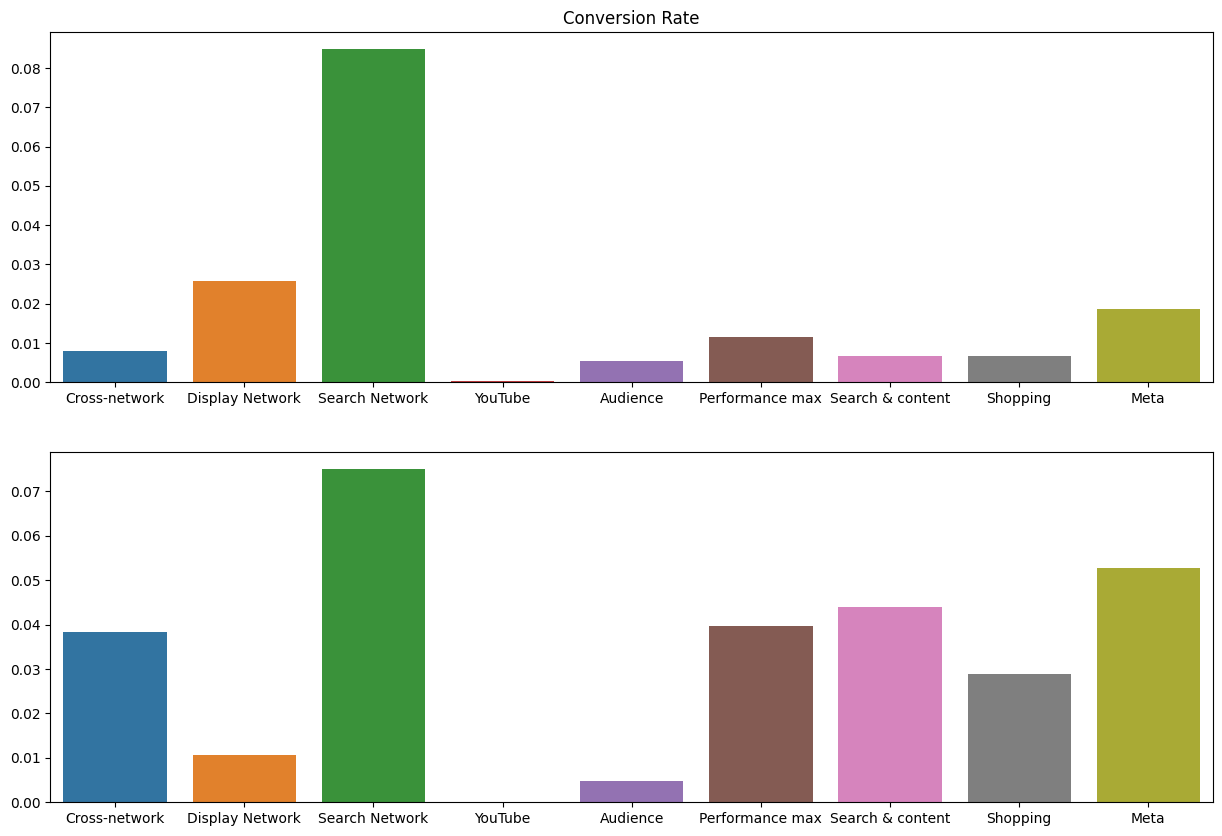

In [70]:
click_through_data = {campaign: ads[ads["Campaign type"] == campaign]["Click Through Rate"].mean() for campaign in ads["Campaign type"].unique()}
click_through_data = pd.DataFrame(click_through_data, index=[0])

conversion_data = {campaign: ads[ads["Campaign type"] == campaign]["Conversion Rate"].mean() for campaign in ads["Campaign type"].unique()}
conversion_data = pd.DataFrame(conversion_data, index=[0])

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(click_through_data, ax=axes[0])
axes[0].set_title("Click Trough Rate")
sns.barplot(conversion_data, ax=axes[1])
axes[0].set_title("Conversion Rate")
plt.show()

In [71]:
ads.to_csv("ads.csv", index=True)

In [73]:
ads = pd.read_csv("ads.csv")
ads

,Date,Platform,Campaign type,Cost,Revenue,Click Through Rate,Conversion Rate,ROI
0,2024-01-01,Google,Cross-network,2613.7,19245.8,0.010168,0.038951,7.363431
1,2024-01-02,Google,Cross-network,3580.9,23205.2,0.009335,0.040209,6.480270
2,2024-01-03,Google,Cross-network,3550.8,24182.9,0.009186,0.044432,6.810550
3,2024-01-04,Google,Cross-network,3176.2,27999.4,0.010260,0.049917,8.815377
4,2024-01-05,Google,Cross-network,2950.6,20000.4,0.010583,0.042608,6.778418
...,...,...,...,...,...,...,...,...
1633,2024-06-26,Meta,Meta,314.3,8778.7,0.018358,0.046171,27.930958
1634,2024-06-27,Meta,Meta,278.7,10476.1,0.028675,0.036092,37.589164
1635,2024-06-28,Meta,Meta,284.0,8220.4,0.028620,0.024410,28.945070
1636,2024-06-29,Meta,Meta,402.0,2865.3,0.026931,0.014964,7.127612


In [76]:
def moving_average(df, value):
    df[value + "_moving_avg"] = df[value].rolling(window=7).mean()
    df[value + "_moving_avg"] = df[value + "_moving_avg"].fillna(df[value].iloc[0:7].mean())
    return df

In [80]:
df = pd.DataFrame()
for campaign in ads["Campaign type"].unique():
    temp = ads[ads["Campaign type"] == campaign]
    temp = moving_average(temp, "ROI")
    temp = moving_average(temp, "Click Through Rate")
    temp = moving_average(temp, "Conversion Rate")
    df = pd.concat([df, temp])
df = df[["Date", "Platform", "Campaign type", "ROI_moving_avg", "Click Through Rate_moving_avg", "Conversion Rate_moving_avg"]]
df.to_csv("trends.csv", index=False)

In [81]:
df = pd.read_csv("trends.csv")
df

,Date,Platform,Campaign type,ROI_moving_avg,Click Through Rate_moving_avg,Conversion Rate_moving_avg
0,2024-01-01,Google,Cross-network,7.500478,0.010312,0.044132
1,2024-01-02,Google,Cross-network,7.500478,0.010312,0.044132
2,2024-01-03,Google,Cross-network,7.500478,0.010312,0.044132
3,2024-01-04,Google,Cross-network,7.500478,0.010312,0.044132
4,2024-01-05,Google,Cross-network,7.500478,0.010312,0.044132
...,...,...,...,...,...,...
1633,2024-06-26,Meta,Meta,31.254992,0.019833,0.048240
1634,2024-06-27,Meta,Meta,31.378400,0.020926,0.046276
1635,2024-06-28,Meta,Meta,29.397621,0.022201,0.042654
1636,2024-06-29,Meta,Meta,28.058017,0.023163,0.040355


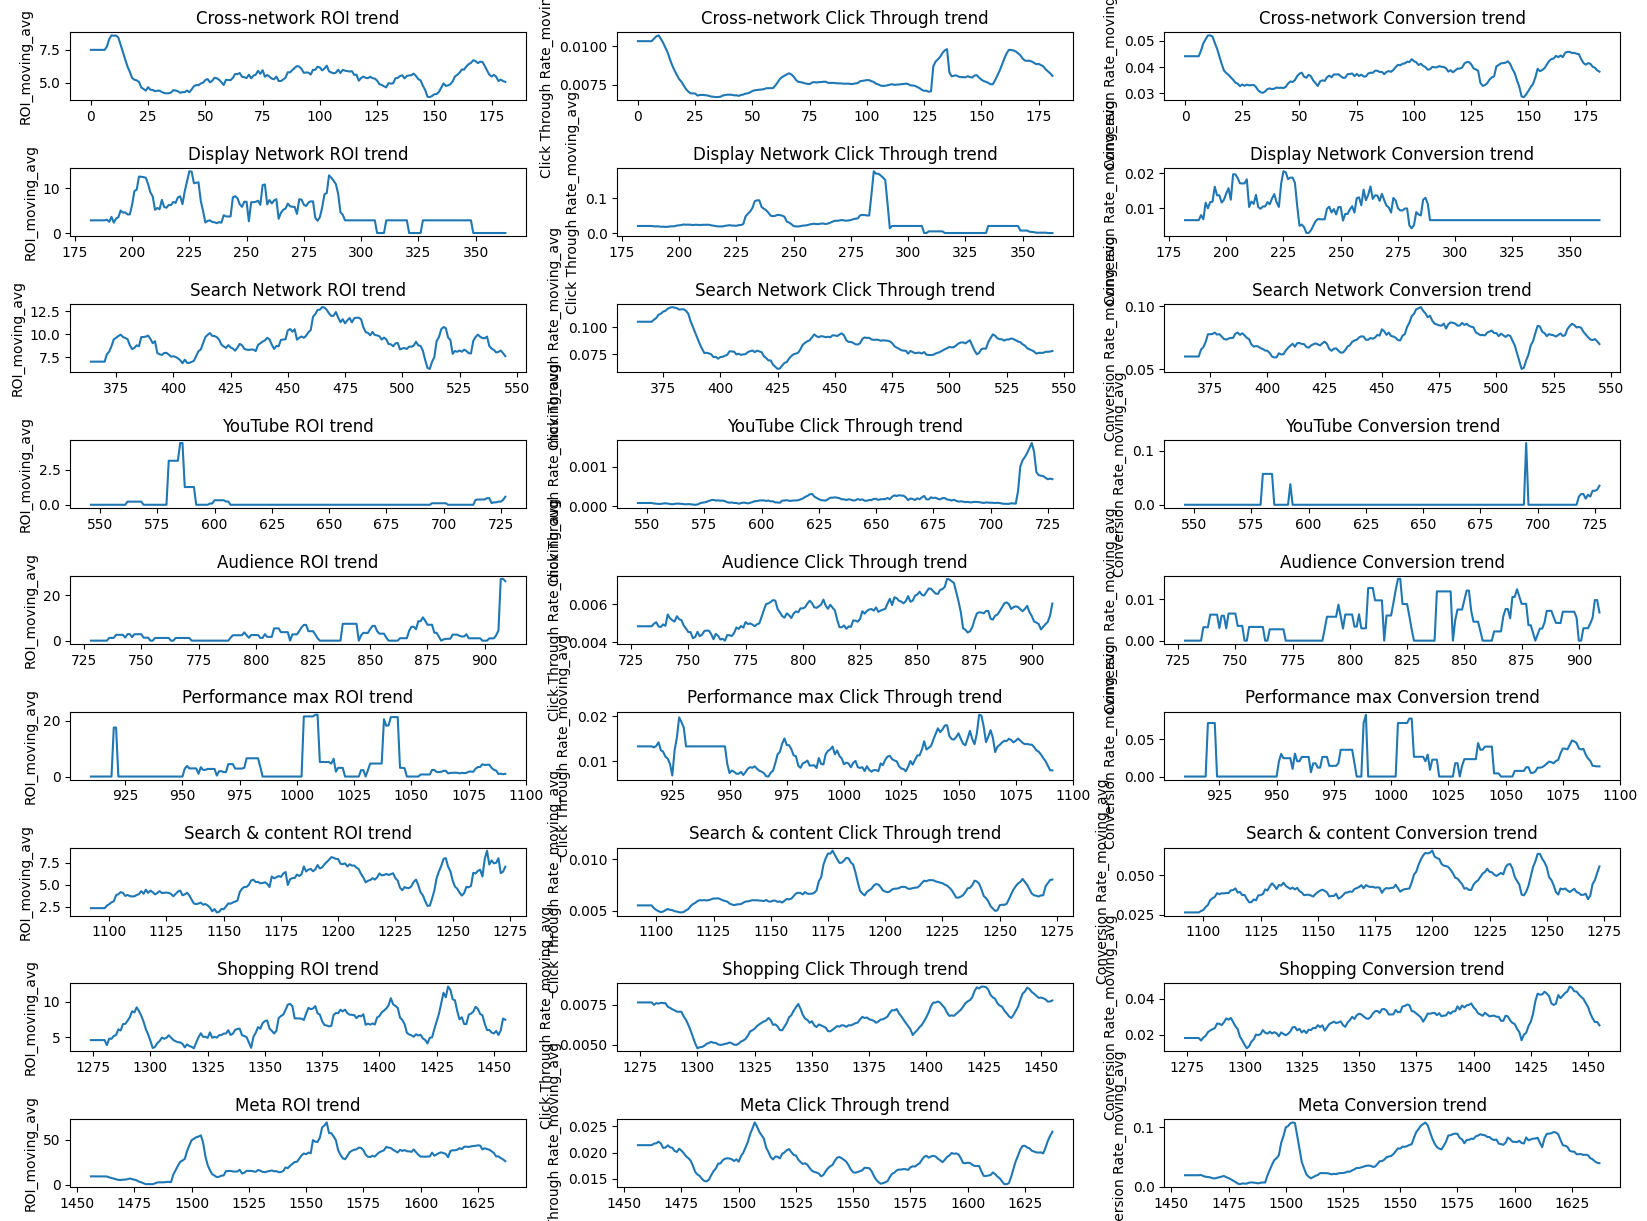

In [83]:
fig, axes = plt.subplots(9, 3, figsize=(20, 15))
axes = axes.flatten()

for i in range(9):
    temp = df[df["Campaign type"] == df["Campaign type"].unique()[i]]

    sns.lineplot(temp["ROI_moving_avg"], ax=axes[i * 3])
    axes[i * 3].set_title(df["Campaign type"].unique()[i] + " ROI trend")

    sns.lineplot(temp["Click Through Rate_moving_avg"], ax=axes[i * 3 + 1])
    axes[i * 3 + 1].set_title(df["Campaign type"].unique()[i] + " Click Through trend")

    sns.lineplot(temp["Conversion Rate_moving_avg"], ax=axes[i * 3 + 2])
    axes[i * 3 + 2].set_title(df["Campaign type"].unique()[i] + " Conversion trend")

plt.subplots_adjust(hspace=1)
plt.show()

In [86]:
df = df[df.Date == "2024-06-30"]
df.to_csv("metrics.csv", index=False)

In [3]:
df = pd.read_csv("metrics.csv")
df

,Date,Platform,Campaign type,ROI_moving_avg,Click Through Rate_moving_avg,Conversion Rate_moving_avg
0,2024-06-30,Google,Cross-network,5.057582,0.008078,0.038270
1,2024-06-30,Google,Display Network,0.000000,0.000000,0.006563
2,2024-06-30,Google,Search Network,7.634246,0.078159,0.070015
3,2024-06-30,Google,YouTube,0.573162,0.000685,0.035274
4,2024-06-30,Microsoft,Audience,26.317654,0.006049,0.006802
5,2024-06-30,Microsoft,Performance max,0.974098,0.007977,0.013559
6,2024-06-30,Microsoft,Search & content,7.051106,0.008036,0.055625
7,2024-06-30,Microsoft,Shopping,7.467076,0.007762,0.025270
8,2024-06-30,Meta,Meta,26.022799,0.023968,0.039692


In [52]:
total_budget = 200000
num_channels = df.shape[0]
ctr = list(np.array(df["Click Through Rate_moving_avg"]))
ctr_min, ctr = ctr[np.argmin(ctr)], np.delete(ctr, np.argmin(ctr))
conversion_rate = list(np.array(df["Conversion Rate_moving_avg"]))
conversion_rate_min, conversion_rate = conversion_rate[np.argmin(conversion_rate)], np.delete(conversion_rate, np.argmin(conversion_rate))
roi = list(np.array(df["ROI_moving_avg"]))
roi_min, roi = roi[np.argmin(roi)], np.delete(roi, np.argmin(roi))

class Marketing(Problem):
    def __init__(self):
        super().__init__(8, 3, 4)
        self.types[:] = [Real(1, 200000) for _ in range(num_channels - 1)]
        self.constraints[:] = [f"<={total_budget - 1}", f">={0.1 * total_budget - 1}", f">={0.1 * total_budget}", f">={0.1 * total_budget}"]
    
    def evaluate(self, solution):
        total_ctr = ctr_min + sum(solution.variables[i] * ctr[i] for i in range(num_channels - 1))
        total_conversion = conversion_rate_min + sum(solution.variables[i] * conversion_rate[i] for i in range(num_channels - 1))
        total_roi = roi_min + sum(solution.variables[i] * roi[i] for i in range(num_channels - 1))
        solution.objectives[:] = [-total_ctr, -total_conversion, -total_roi]
        solution.constraints[:] = [sum(solution.variables), sum(solution.variables[:3]), sum(solution.variables[3:7]), (solution.variables[7])]

In [53]:
algorithm = NSGAII(Marketing())
algorithm.run(10000)

In [54]:
solution = nondominated(algorithm.result)
if solution:
    solution = solution[0]
    invested = [round(elem) for elem in solution.variables]
    CTR = -1 * solution.objectives[0] / total_budget
    Conversion = -1 * solution.objectives[1] / total_budget
    ROI = -1 * solution.objectives[2] / total_budget

In [57]:
if solution:
    print("investment weights:\n")
    print("Cross Network: ", invested[0], f" ({invested[0] * 100 / (sum(invested) + 1)} %)", "\n")
    print("Display Network: ", 1, f" ({100 / (sum(invested) + 1)} %)", "\n")
    print("Search Network: ", invested[1], f" ({invested[1] * 100 / (sum(invested) + 1)} %)", "\n")
    print("YouTube: ", invested[2], f" ({invested[2] * 100 / (sum(invested) + 1)} %)", "\n")
    print("Audience: ", invested[3], f" ({invested[3] * 100 / (sum(invested) + 1)} %)", "\n")
    print("Performance max: ", invested[4], f" ({invested[4] * 100 / (sum(invested) + 1)} %)", "\n")
    print("Search & content: ", invested[5], f" ({invested[5] * 100 / (sum(invested) + 1)} %)", "\n")
    print("Shopping: ", invested[6], f" ({invested[6] * 100 / (sum(invested) + 1)} %)", "\n")
    print("Meta: ", invested[7], f" ({invested[7] * 100 / (sum(invested) + 1)} %)", "\n")
    print("total spent: ", sum(invested) + 1)
    print("CTR: ", CTR)
    print("Conversion Rate: ", Conversion)
    print("ROI: ", ROI)
else:
    print("No feasible solution")

investment weights:

Cross Network:  1683  (0.8419041139747079 %) 

Display Network:  1  (0.0005002401152553225 %) 

Search Network:  31834  (15.924643829037938 %) 

YouTube:  869  (0.4347086601568753 %) 

Audience:  50446  (25.23511285417 %) 

Performance max:  307  (0.15357371538338402 %) 

Search & content:  8817  (4.410617096206179 %) 

Shopping:  2533  (1.267108211941732 %) 

Meta:  103414  (51.731831279013925 %) 

total spent:  199904
CTR:  0.026895513366533924
Conversion Rate:  0.036651819307215616
ROI:  21.760851811935744
